In [1]:
import numpy as np
import pandas as pd 

In [3]:
df = pd.read_csv("data (2).csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
X = df.drop(columns=["id","diagnosis","Unnamed: 32"])
y = df["diagnosis"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
st = StandardScaler()
x_scaled = st.fit_transform(X)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state=2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
print(x_train.shape,y_train.shape)

(455, 30) (455,)


In [20]:
knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [24]:
accuracy_score(y_train,y_pred_train)

0.9802197802197802

In [25]:
accuracy_score(y_test,y_pred_test)

0.9824561403508771

In [31]:
score = {}
score_t = {}
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    score[i] = accuracy_score(y_test,y_pred)
    score_t[i] = accuracy_score(y_train,y_pred_train)
    
print(score)
print(score_t)

{1: 0.9649122807017544, 2: 0.9736842105263158, 3: 0.9824561403508771, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9736842105263158, 7: 0.9736842105263158, 8: 0.9736842105263158, 9: 0.9736842105263158, 10: 0.9736842105263158, 11: 0.9736842105263158, 12: 0.9736842105263158, 13: 0.9736842105263158, 14: 0.9649122807017544, 15: 0.9649122807017544}
{1: 1.0, 2: 0.967032967032967, 3: 0.9802197802197802, 4: 0.9714285714285714, 5: 0.9758241758241758, 6: 0.9714285714285714, 7: 0.9736263736263736, 8: 0.9736263736263736, 9: 0.9736263736263736, 10: 0.9714285714285714, 11: 0.9692307692307692, 12: 0.967032967032967, 13: 0.9692307692307692, 14: 0.9648351648351648, 15: 0.9692307692307692}


In [29]:
import matplotlib.pyplot as plt

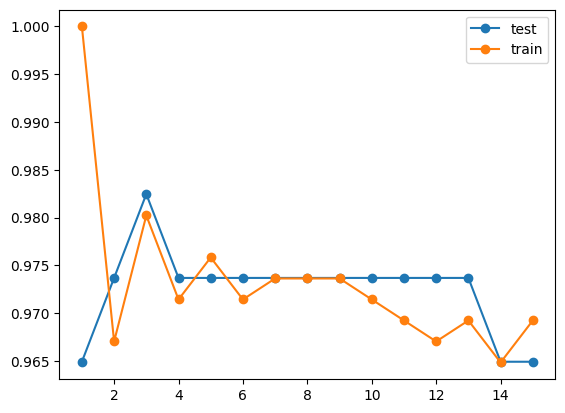

In [36]:
plt.plot(score.keys(),score.values(),marker='o',label='test')
plt.plot(score_t.keys(),score_t.values(),marker='o',label='train')
plt.legend();